<a href="https://colab.research.google.com/github/karinnecristina/Data-Science/blob/master/Google_Play.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Análise dos dados da Google Play Store**

<p align=center>

<img src= "https://drive.google.com/uc?id=1YLGpuCftOiytiBp2GuvrHI0tF5p8axl_"/>

</p>




A Play Store é a loja de aplicativos do Google, é através dela que os usuários de celulares com sistema operacional Android conseguem baixar apps como WhatsApp, Facebook, Spotify, Netflix e vários outros para seus dispositivos. Apesar do uso ser gratuito, ela também conta com ofertas de aplicativos e serviços pagos.

##**Objetivo**

Os dados dos aplicativos da Play Store têm um enorme potencial para levar as empresas que desenvolvem essas aplicações ao sucesso.O objetivo deste projeto é analisar esses dados com o intuito de ajudar os desenvolvedores a entender que tipo de aplicativo provavelmente atrairá mais usuários.


 ### **Obtenção dos Dados**

Os dados usados nessa análise são referentes ao ano de 2018 e foram obtidos a partir do site [Kaggle.com](https://www.kaggle.com/lava18/google-play-store-apps)

In [0]:
# Importando os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [0]:
# Lendo o arquivo:
df_app = pd.read_csv('/content/drive/My Drive/Curso_Dataquest/googleplaystore.csv')

 ### **Análise dos Dados**

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

<Enter>


**Dicionário das variáveis**

* App - Nome do aplicativo
* Category - Categoria à qual o aplicativo pertence
* Rating - classificação do aplicativo 
* Reviews - Número de avaliações de usuários do aplicativo
* Size - Tamanho do aplicativo
* Installs - Número de downloads / instalações de usuário para o aplicativo 
* Type - Pago ou Gratuito
* Price - preço
* Content Rating - Faixa etária em que o aplicativo é direcionado - Crianças / maiores de 21 anos / Adulto
* Genres - Um aplicativo pode pertencer a vários gêneros (além da categoria principal). Por exemplo, um jogo musical familiar pertence aos gêneros Música, Jogo, Família.
* Last Updated - Data em que o aplicativo foi atualizado pela última vez na Play Store
* Current Ver - Versão atual do aplicativo disponível na Play Store
* Android Ver - Versão mínima exigida do Android

Vamos dar uma olhada nas primeiras linhas do Dataframe.

In [3]:
# Primeiras 5 linhas:
df_app.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


###**Quantos linhas e quantas colunas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [4]:
# Tamanho do Dataframe:
print(f'Número de linhas: {len(df_app.index)}')
print(f'Número de colunas: {len(df_app.columns)}\n')

# Identificando o tipo de cada variável:
display(df_app.dtypes)

Número de linhas: 10841
Número de colunas: 13



App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

#**Limpeza e transformação dos dados**

Precisamos garantir que os dados que estamos analisando sejam precisos, caso contrário, os resultados de nossa análise estarão errados.

In [5]:
# Corrigindo o nome das colunas:
df_app.columns = df_app.columns.str.replace(' ', '_')

# Visualizando os dados novamente:
df_app.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Vou iniciar a análise verificando se há registos duplicados no Dataframe, pois não nos interessa analisar o mesmo aplicativo mais de uma vez.

In [6]:
# Verificando valores duplicados:
if any(df_app.App.duplicated()) is True:
   print(f'Existe valores duplicados na coluna "App"? {True}')
else:
   print(f'Existe valores duplicados na coluna "App"? {False}')

Existe valores duplicados na coluna "App"? True


Bom, infelizmente temos registros duplicados, portanto, precisamos remover essas entradas duplicadas e manter apenas uma entrada por aplicativo. Uma coisa que poderíamos fazer é remover as linhas duplicadas aleatoriamente, mas vamos encontrar uma maneira melhor.

Quanto maior o número de "Reviews", mais recentes devem ser os dados. Em vez de remover duplicatas aleatoriamente, manteremos apenas a linha com o maior número de avaliações e removeremos as outras entradas.

Não sabemos a ordem dos registros e se não ordenarmos podemos correr o risco de eliminar um aplicativo que tem uma avaliação alta. Para ordenar pelo número de "Reviews" precisamos mudar seu tipo de dado para numérico. Quando tentei fazer a transformação recebi o seguinte erro **"ValueError: invalid literal for int() with base 10: '3.0M'"**.
Vamos identificar quais linhas têm esse problema:

In [7]:
# Identificando registro:
df_app[~df_app.Reviews.str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Apenas um dos registros possue esse problema além disso os registros das outras colunas estão inconsistentes, na coluna "Category" por exemplo essa linha possui um valor de 1.9, então vou remover essa linha e transformar o tipo do dado.


In [0]:
# Removendo o registro:
df_app.drop(df_app.index[10472], inplace=True)

In [0]:
# Convertendo o tipo dos dados:
df_app.Reviews = pd.to_numeric(df_app.Reviews)

Agora vou remover os valores duplicados mantendo os registros que tem a avaliação mais alta.

In [0]:
# Removendo os aplicativos duplicados:
df_app = df_app.sort_values(by='Reviews', ascending=False).drop_duplicates('App', keep='first')

# Reorganizando os indices:
df_app = df_app.reset_index(drop=True)

In [11]:
df_app.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Facebook,SOCIAL,4.1,78158306,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
1,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
2,Instagram,SOCIAL,4.5,66577446,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
4,Clash of Clans,GAME,4.6,44893888,98M,"100,000,000+",Free,0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up


Vamos analisar mais a fundo cada um dos atributos.

##*Size*

In [12]:
# Valores únicos:
display(df_app.Size.unique())

array(['Varies with device', '98M', '76M', '97M', '74M', '40M', '52M',
       '14M', '15M', '88M', '24M', '85M', '94M', '99M', '63M', '92M',
       '17M', '62M', '71M', '34M', '95M', '67M', '58M', '100M', '59M',
       '53M', '96M', '16M', '26M', '41M', '9.9M', '51M', '32M', '11M',
       '55M', '60M', '79M', '69M', '42M', '77M', '57M', '82M', '75M',
       '36M', '3.3M', '68M', '22M', '7.6M', '50M', '33M', '7.4M', '89M',
       '18M', '25M', '78M', '46M', '49M', '9.7M', '37M', '72M', '39M',
       '87M', '6.1M', '5.1M', '70M', '28M', '29M', '61M', '7.1M', '48M',
       '21M', '35M', '54M', '12M', '56M', '3.8M', '8.7M', '91M', '27M',
       '45M', '66M', '31M', '4.7M', '8.2M', '43M', '13M', '47M', '20M',
       '80M', '6.6M', '3.1M', '6.5M', '9.1M', '30M', '7.9M', '4.2M',
       '44M', '4.4M', '93M', '8.9M', '83M', '3.5M', '73M', '90M', '9.8M',
       '19M', '9.2M', '64M', '1.5M', '5.2M', '23M', '5.3M', '2.5M', '10M',
       '2.7M', '2.1M', '86M', '4.9M', '2.9M', '9.0M', '8.4M', '7.3M'

O tamanho do aplicativo está no formato "string". Precisamos convertê-lo em um valor numérico. Se o tamanho estiver acompanhado da string "k" (exemplo:"512k"), que representa o tamanho do aplicativo em kilobytes, o "k" deve ser removido e o tamanho deve ser convertido em um equivalente a 'megabytes'. Depois removemos a string "M", mudamos a string "Varies with device" para NaN e por último transformamos o tipo de dado para numérico.


In [0]:
# Limpeza da coluna:
df_app.Size = df_app.Size.map(lambda x: str (round ((float (x.rstrip ('k')) / 1024), 1)) if x [-1] == 'k' else x) 
df_app.Size = df_app.Size.map(lambda x: x.rstrip ('M'))
df_app.Size = df_app.Size.map(lambda x: np.nan if x.startswith ('Varies') else x) 
df_app.Size = df_app.Size.astype(float)

In [0]:
# Preenchendo os registros nulos:
df_app.Size.fillna(df_app.groupby('Category')['Size'].transform('mean'),inplace = True)

##*Installs*


In [15]:
df_app.Installs.value_counts()

1,000,000+        1417
100,000+          1113
10,000+           1030
10,000,000+        937
1,000+             887
100+               709
5,000,000+         607
500,000+           504
50,000+            469
5,000+             468
10+                385
500+               328
50,000,000+        204
50+                204
100,000,000+       189
5+                  82
1+                  67
500,000,000+        24
1,000,000,000+      20
0+                  14
0                    1
Name: Installs, dtype: int64

Os números de instalação não parecem precisos o suficiente, podemos ver que a maioria dos valores é (100+, 1.000+, 5.000+ etc.).

Não sabemos se um aplicativo com mais de 100.000 instalações possui 100.000 instalações, 200.000 ou 350.000. Posteriormente vamos tentar descobrir quais gêneros de aplicativos atraem mais usuários e para esse propósito não iremos precisar de uma precisão perfeita em relação ao número de usuários.

Vamos deixar os números como estão, o que significa que iremos considerar que um aplicativo com mais de 100.000 instalações possui 100.000 instalações e um aplicativo com mais de 1.000.000 instalações possui 1.000.000 instalações e assim por diante. 

Para realizar esses cálculos, no entanto, vamos precisar converter cada valor de instalação que está como string para número. Isso significa que precisamos remover as vírgulas e os demais caracteres, caso contrário, a conversão falhará e causará um erro.

In [16]:
# Limpando os dados e convertendo os valores:
df_app.Installs = df_app.Installs.apply(lambda x: x.strip('+'))
df_app.Installs= df_app.Installs.apply(lambda x: x.replace(',',''))
df_app.Installs = pd.to_numeric(df_app.Installs)
df_app.Installs.value_counts()

1000000       1417
100000        1113
10000         1030
10000000       937
1000           887
100            709
5000000        607
500000         504
50000          469
5000           468
10             385
500            328
50000000       204
50             204
100000000      189
5               82
1               67
500000000       24
1000000000      20
0               15
Name: Installs, dtype: int64

##*Price*

In [17]:
# Valores únicos da coluna "Price"
df_app.Price.unique()

array(['0', '$6.99', '$0.99', '$2.99', '$1.99', '$2.49', '$4.99', '$5.99',
       '$4.49', '$9.99', '$3.99', '$1.49', '$3.95', '$7.99', '$3.49',
       '$8.99', '$13.99', '$19.99', '$11.99', '$12.99', '$2.90', '$17.99',
       '$399.99', '$29.99', '$14.99', '$2.95', '$4.77', '$24.99', '$3.90',
       '$2.50', '$3.28', '$1.20', '$2.59', '$9.00', '$1.59', '$1.00',
       '$5.49', '$18.99', '$299.99', '$1.97', '$400.00', '$16.99',
       '$389.99', '$33.99', '$10.00', '$10.99', '$4.84', '$37.99',
       '$1.61', '$8.49', '$4.60', '$79.99', '$4.29', '$1.70', '$1.50',
       '$1.29', '$19.40', '$3.08', '$379.99', '$2.56', '$15.46', '$7.49',
       '$4.59', '$2.00', '$14.00', '$6.49', '$15.99', '$74.99', '$3.88',
       '$3.02', '$39.99', '$89.99', '$5.00', '$1.75', '$1.26', '$2.60',
       '$19.90', '$4.80', '$1.76', '$46.99', '$3.04', '$4.85', '$30.99',
       '$3.61', '$154.99', '$394.99', '$109.99', '$1.96', '$1.04',
       '$28.99', '$25.99', '$200.00'], dtype=object)

O preço está no formato de "string". Primeiro precisamos remover o cifrão   para depois convertê-lo em formato numérico.

In [0]:
# Removendo o símbolo monetário e transformando o tipo de dado:
df_app.Price=df_app.Price.apply(lambda x: x.replace('$','') if '$' in str(x) else x)
df_app.Price = pd.to_numeric(df_app.Price)

##*Content_Rating*

In [19]:
# Valores únicos da coluna:
df_app.Content_Rating.unique()

array(['Teen', 'Everyone', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

**'Unrated'** quer dizer sem classificação, não foi informado para que tipo de público esse app foi disponibilizado, vamos identificar quais são esses aplicativos:-

In [20]:
# Identificando os aplicativos:
df_app.loc[(df_app.Content_Rating == "Unrated")]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
4714,DC Universe Online Map,TOOLS,4.1,1186,6.4,50000,Free,0.0,Unrated,Tools,"February 27, 2012",1.3,2.3.3 and up
8977,Best CG Photography,FAMILY,NaN,1,2.5,500,Free,0.0,Unrated,Entertainment,"June 24, 2015",5.2,3.0 and up


Vamos remover essas duas linhas

In [0]:
# Removendo as linhas:
df_app.drop(df_app.index[[4714,8977]], inplace=True)

##*Genres*

In [22]:
df_app.Genres.unique()

array(['Social', 'Communication', 'Strategy', 'Tools', 'Arcade',
       'Video Players & Editors', 'Casual', 'Sports', 'News & Magazines',
       'Action', 'Photography', 'Adventure', 'Casual;Action & Adventure',
       'Travel & Local', 'Racing', 'Personalization', 'Maps & Navigation',
       'Entertainment', 'Trivia', 'Education;Education', 'Shopping',
       'Productivity', 'Health & Fitness', 'Adventure;Action & Adventure',
       'Simulation', 'Books & Reference', 'Lifestyle', 'Role Playing',
       'Arcade;Action & Adventure', 'Weather', 'Puzzle', 'Casino', 'Card',
       'Word', 'Puzzle;Action & Adventure', 'Sports;Action & Adventure',
       'Board', 'Finance', 'Puzzle;Brain Games',
       'Racing;Action & Adventure', 'Business', 'Education',
       'Food & Drink', 'Educational;Pretend Play', 'Comics',
       'Card;Action & Adventure', 'Music',
       'Educational;Action & Adventure', 'Parenting',
       'Simulation;Action & Adventure', 'Role Playing;Action & Adventure',
      


Os dados estão no formato Categoria; Subcategoria. Vamos dividi-los e extrair apenas a categoria principal. 

In [23]:
# Extraindo a categoria principal:
df_app.Genres = df_app.Genres.str.split(';').str[0]
df_app.Genres.unique()

array(['Social', 'Communication', 'Strategy', 'Tools', 'Arcade',
       'Video Players & Editors', 'Casual', 'Sports', 'News & Magazines',
       'Action', 'Photography', 'Adventure', 'Travel & Local', 'Racing',
       'Personalization', 'Maps & Navigation', 'Entertainment', 'Trivia',
       'Education', 'Shopping', 'Productivity', 'Health & Fitness',
       'Simulation', 'Books & Reference', 'Lifestyle', 'Role Playing',
       'Weather', 'Puzzle', 'Casino', 'Card', 'Word', 'Board', 'Finance',
       'Business', 'Food & Drink', 'Educational', 'Comics', 'Music',
       'Parenting', 'Dating', 'House & Home', 'Libraries & Demo',
       'Art & Design', 'Auto & Vehicles', 'Medical', 'Beauty', 'Events',
       'Music & Audio'], dtype=object)

Observe que entre as categorias temos "Music & Audio" e "Music", que na verdade são a mesma coisa, vamos corrigir isso.

In [24]:
# Corrigindo o nome da categoria.
df_app.Genres.replace(['Music & Audio'], 'Music',inplace =True)
df_app.Genres.unique()

array(['Social', 'Communication', 'Strategy', 'Tools', 'Arcade',
       'Video Players & Editors', 'Casual', 'Sports', 'News & Magazines',
       'Action', 'Photography', 'Adventure', 'Travel & Local', 'Racing',
       'Personalization', 'Maps & Navigation', 'Entertainment', 'Trivia',
       'Education', 'Shopping', 'Productivity', 'Health & Fitness',
       'Simulation', 'Books & Reference', 'Lifestyle', 'Role Playing',
       'Weather', 'Puzzle', 'Casino', 'Card', 'Word', 'Board', 'Finance',
       'Business', 'Food & Drink', 'Educational', 'Comics', 'Music',
       'Parenting', 'Dating', 'House & Home', 'Libraries & Demo',
       'Art & Design', 'Auto & Vehicles', 'Medical', 'Beauty', 'Events'],
      dtype=object)

##*Last_Update*

Vamos mudar o tipo de dado dessa coluna de string para date. Depois criar uma nova coluna chamada "Last_Updated_Days" que conterá a diferença entre a data da última atualização e hoje, assim podemos analisar quanto tempo (em dias) faz que esse aplicativo foi atualizado.


In [0]:
# Convertendo a data de string para date.
from datetime import datetime,date
temp = pd.to_datetime(df_app.Last_Updated)

In [26]:
# Criando a nova coluna:
df_app['Last_Updated_Days'] = temp.apply(lambda x:date.today()-datetime.date(x))
df_app.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,Last_Updated_Days
0,Facebook,SOCIAL,4.1,78158306,15.983598,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,583 days
1,WhatsApp Messenger,COMMUNICATION,4.4,69119316,11.306198,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,583 days
2,Instagram,SOCIAL,4.5,66577446,15.983598,1000000000,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device,586 days
3,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,11.306198,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,585 days
4,Clash of Clans,GAME,4.6,44893888,98.000000,100000000,Free,0.0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up,602 days


##*Android_Ver*

In [27]:
df_app.Android_Ver.unique()

array(['Varies with device', '4.1 and up', '4.0 and up', '4.0.3 and up',
       '3.0 and up', '4.4 and up', '4.2 and up', '2.3 and up',
       '4.3 and up', '5.0 and up', '2.3.3 and up', '2.1 and up',
       '3.1 and up', '2.0.1 and up', '2.0 and up', '4.1 - 7.1.1',
       '2.2 and up', '6.0 and up', '5.0 - 8.0', '1.5 and up',
       '4.0.3 - 7.1.1', '1.6 and up', '7.1 and up', '7.0 and up',
       '3.2 and up', '5.1 and up', '8.0 and up', '5.0 - 6.0',
       '1.0 and up', '4.4W and up', nan, '7.0 - 7.1.1', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

A maioria dos valores tem um valor inferior e um valor superior (ou seja, um intervalo), mas o que nos interessa é saber a versão miníma que um dispositivo deve ter para que esse aplicativo funcione.

In [0]:
# Extraindo a versão miníma:
df_app.Android_Ver = df_app.Android_Ver.apply(lambda x:str(x).split(' and ')[0].split(' - ')[0])
df_app.Android_Ver = df_app.Android_Ver.replace('4.4W','4.4')

In [29]:
df_app.Android_Ver.unique()

array(['Varies with device', '4.1', '4.0', '4.0.3', '3.0', '4.4', '4.2',
       '2.3', '4.3', '5.0', '2.3.3', '2.1', '3.1', '2.0.1', '2.0', '2.2',
       '6.0', '1.5', '1.6', '7.1', '7.0', '3.2', '5.1', '8.0', '1.0',
       'nan'], dtype=object)

A coluna "Current_ver" não será usada em nossa análise.

In [0]:
# Dropando as colunas irrelevantes:
def remove_features(lista_features):
    for i in lista_features:
        df_app.drop(i,axis=1,inplace=True)
remove_features(['Current_Ver'])

###**Qual a porcentagem de valores ausentes no dataset?**

Vamos analisar se a quantidade de valores nulos são siginificativos comparados ao total de entradas.


In [0]:
def missing_value(dataset):
  """ Porcentagem e total de valores faltantes de cada coluna, ordenando do maior para o menor """
  total = dataset.isnull().sum().sort_values(ascending=False)
  percent = dataset.isnull().sum()/dataset.isnull().count().sort_values(ascending=False)
  missing_data = pd.concat([total, percent], axis=1, sort=False, keys=['total', 'percent'])
  missing_data[missing_data['percent']!=0]
  return missing_data

In [32]:
missing_value(df_app)

,total,percent
Rating,1462,0.151393
Type,1,0.000104
Last_Updated_Days,0,0.000000
Android_Ver,0,0.000000
Last_Updated,0,0.000000
Genres,0,0.000000
Content_Rating,0,0.000000
Price,0,0.000000
Installs,0,0.000000
Size,0,0.000000


A coluna **"Rating"** representa a classificação que o úsuario deu para o aplicativo, essa coluna tem cerca de 15% de valores faltantes, vamos entender melhor como essa classificação é feita.

## **O que é classificar um app?**

Na Play Store (loja de aplicativo da google), classificar um app significa deixar a sua nota de avaliação na página de dowloand do aplicativo com ou sem comentário, a base não possui uma coluna com os comentários.

Não é obrigatório deixar uma classificação para o app mas isso ajuda e motiva os desenvolvedores.

## **Como essa classificação é feita?**

Basta clicar nas estrelas que você pretende deixar.

![alt text](https://drive.google.com/uc?id=11_EhqLg7QWcK2I0OTRCHYWGTtZKTNDkU)

##★☆☆☆☆ – Avaliação muito fraca
O usuário não gostou da aplicação, contêm um número exagerado de propagandas e a aplicação não foi bem desenvolvida.

##★★☆☆☆ – Avaliação fraca
Ainda que seja uma avaliação fraca, o usuário pode ter gostado de alguma funcionalidade do app.

##★★★☆☆ – Avaliação razoável
O usuário considera que esse aplicativo cumpriu com a sua finalidade, mas precisa melhorar em alguns aspectos, como no desing por exemplo.

##★★★★☆ – Avaliação boa
Um app com 4 estrelas já é considerado muito bom, cumpre o que promete e foi bem desenvolvido.

##★★★★★ – Avaliação ótima
O usuário considera que esse app foi bem desenvolvido, tem um bom design, ótima navegação e suas funcionalidades são boas.










Depois que entendemos como essa avaliação é feita, vamos remover os valores faltantes, como eles não possuem uma classificação podemos concluir que esses aplicativos não são atraentes para os usuários.

A coluna "Type" só tem um valor faltante que também será removido.

In [0]:
# Removendo os valores faltantes.
df_app.dropna(axis = 0, how ='any', inplace = True)

In [34]:
# Verificando se os valores foram preenchidos corretamente
missing_value(df_app)

,total,percent
Last_Updated_Days,0,0.0
Android_Ver,0,0.0
Last_Updated,0,0.0
Genres,0,0.0
Content_Rating,0,0.0
Price,0,0.0
Type,0,0.0
Installs,0,0.0
Size,0,0.0
Reviews,0,0.0


#**Análise Exploratória dos Dados (EDA)**

###**Quais são as categorias que tem o maior número de aplicativos?**

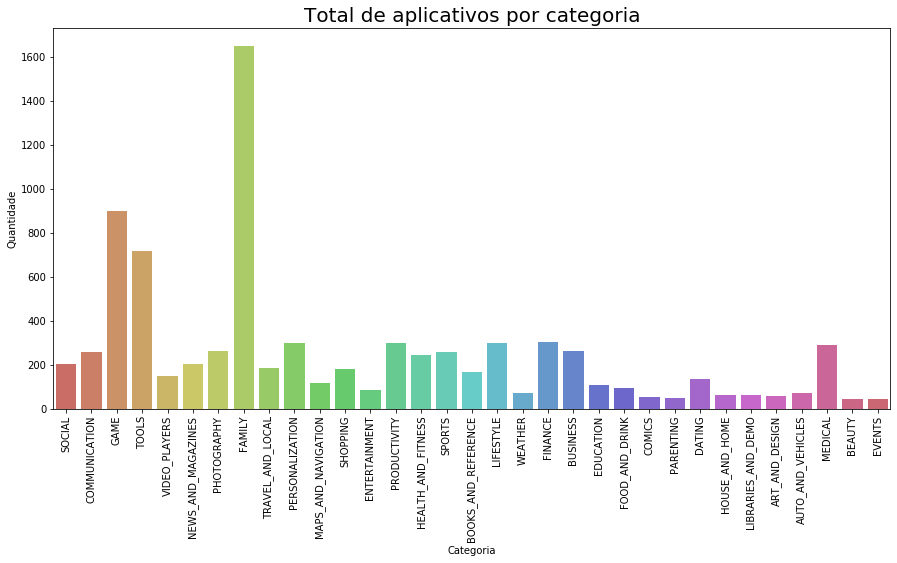

In [35]:
plt.figure(figsize=(15,7))
fig = sns.countplot(x=df_app.Category, palette="hls")
plt.xlabel('Categoria')
plt.ylabel('Quantidade')
plt.title('Total de aplicativos por categoria', size=20)
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)

**Family**, **Game** e **Tools** são as categorias com mais aplicativos.

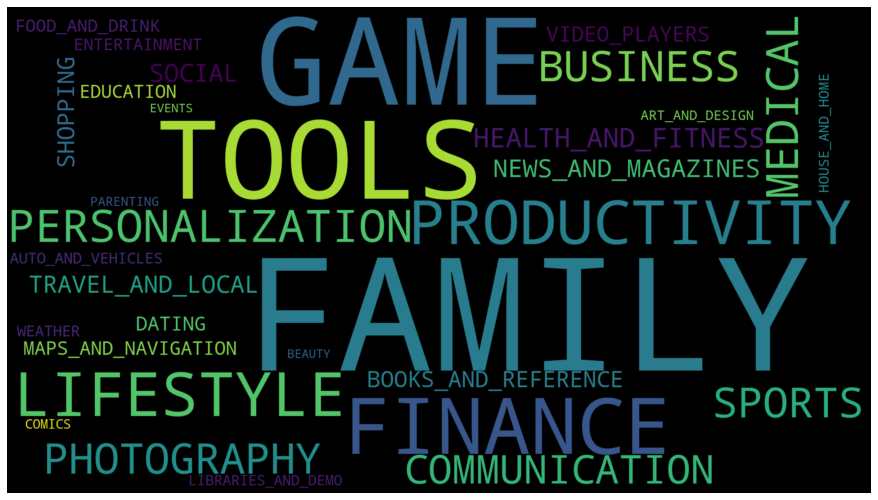

In [36]:
# Wordcloud com a representação das categorias.
wordcloud = WordCloud(max_font_size=350, collocations=False,width=1920, height=1080, background_color="black").generate(' '.join(df_app.Category))
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

###**Os aplicativos são direcionados para quais faixa etárias?**

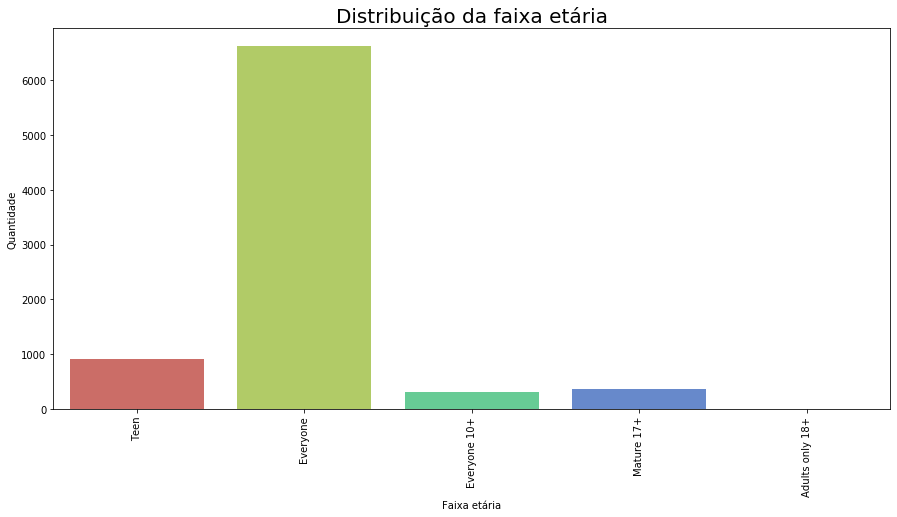

In [37]:
plt.figure(figsize=(15,7))
fig = sns.countplot(x=df_app.Content_Rating, palette="hls")
plt.xlabel('Faixa etária')
plt.ylabel('Quantidade')
plt.title('Distribuição da faixa etária', size=20)
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)

A maioria dos aplicativos está disponível para todos os públicos.

###**Qual o maior volume de downloads?**


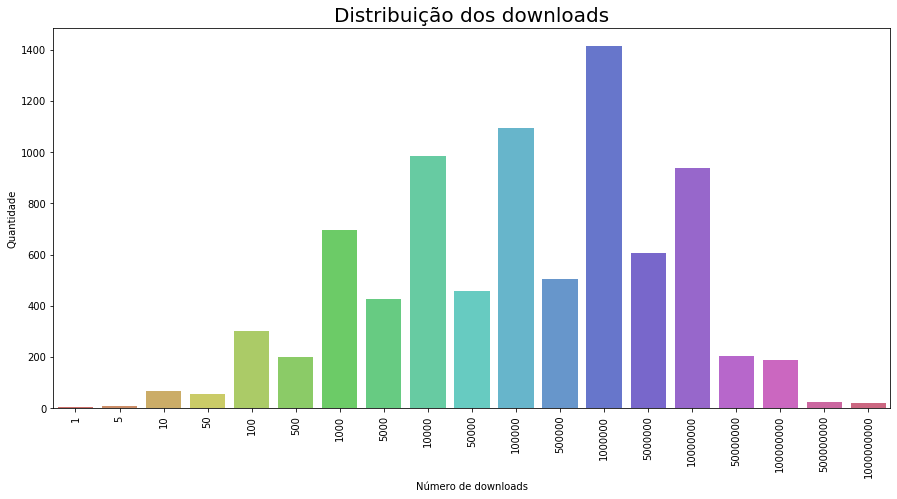

In [38]:
plt.figure(figsize=(15,7))
fig = sns.countplot(x=df_app.Installs, palette="hls")
plt.xlabel('Número de downloads')
plt.ylabel('Quantidade')
plt.title('Distribuição dos downloads', size=20)
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)

Muitos aplicativos tiveram cerca de 1 milhão de downloads.

###**Quais são os 15 aplicativos com o maior número de downloads?**

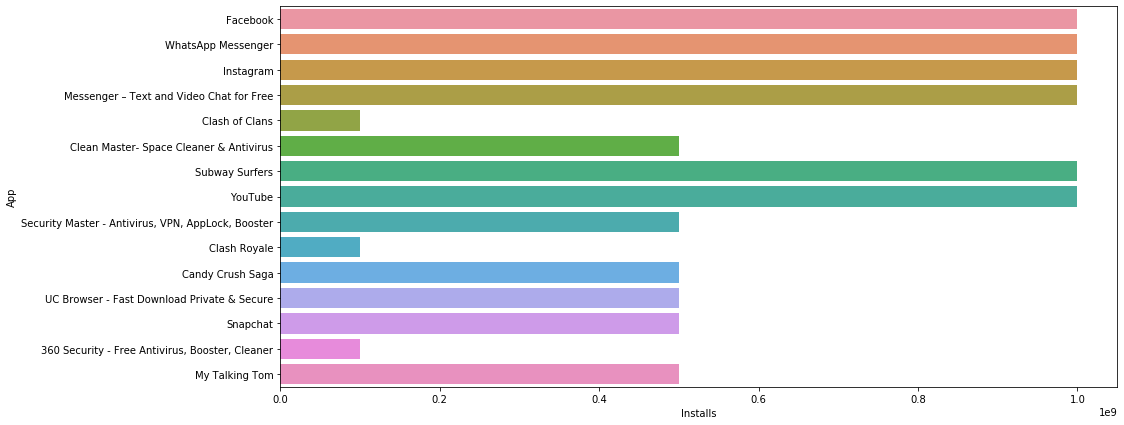

In [39]:
plt.figure(figsize=(15,7))
ax=sns.barplot(y='App',x='Installs',data=df_app.head(15))
plt.show()

In [40]:
# Os 15 aplicativos com mais downloads:
df_app.sort_values(by="Installs", ascending=False)[["App", "Installs", "Rating"]].head(15)

,App,Installs,Rating
0,Facebook,1000000000,4.1
22,Google Photos,1000000000,4.5
251,Google Play Books,1000000000,3.9
89,Google+,1000000000,4.2
93,Gmail,1000000000,4.3
1,WhatsApp Messenger,1000000000,4.4
188,Google Street View,1000000000,4.2
51,Google Play Games,1000000000,4.3
377,Google Play Movies & TV,1000000000,3.7
388,Google News,1000000000,3.9


###**Quais são os 15 aplicativos com as maiores avaliações?**

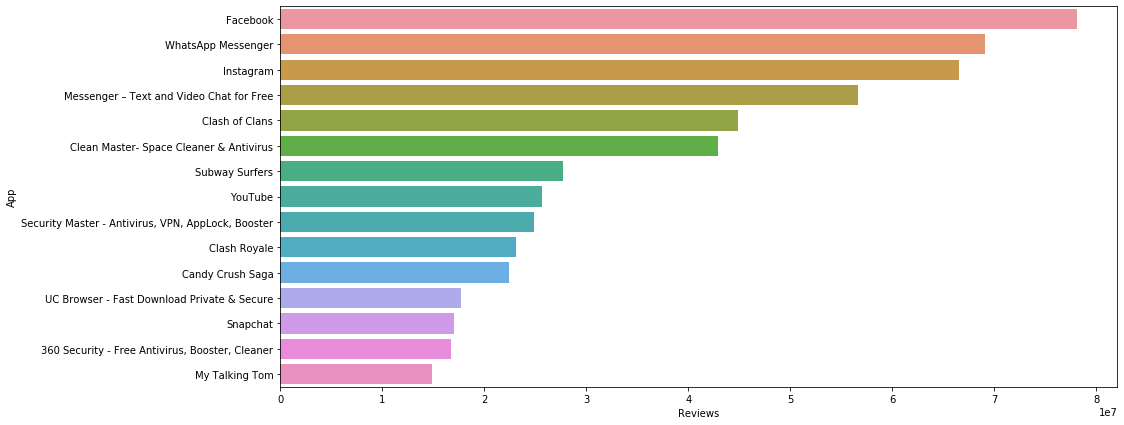

In [41]:
plt.figure(figsize=(15,7))
ax=sns.barplot(y='App',x='Reviews',data=df_app.head(15))
plt.show()


In [42]:
# Os 15 aplicativos com mais avaliações:
df_app.sort_values(by="Reviews", ascending=False)[["App", "Reviews", "Rating"]].head(15)

,App,Reviews,Rating
0,Facebook,78158306,4.1
1,WhatsApp Messenger,69119316,4.4
2,Instagram,66577446,4.5
3,Messenger – Text and Video Chat for Free,56646578,4.0
4,Clash of Clans,44893888,4.6
5,Clean Master- Space Cleaner & Antivirus,42916526,4.7
6,Subway Surfers,27725352,4.5
7,YouTube,25655305,4.3
8,"Security Master - Antivirus, VPN, AppLock, Boo...",24900999,4.7
9,Clash Royale,23136735,4.6


As maiores avaliações são para os aplicativos de rede social, o campeão é o Facebook.

<p align=center>

<img src= "https://drive.google.com/uc?id=1xN_yspozJbvMn_dXIEP4uWEEmadJz_dB"/>

</p>

###**A loja tem mais aplicativos pagos ou gratuitos?**

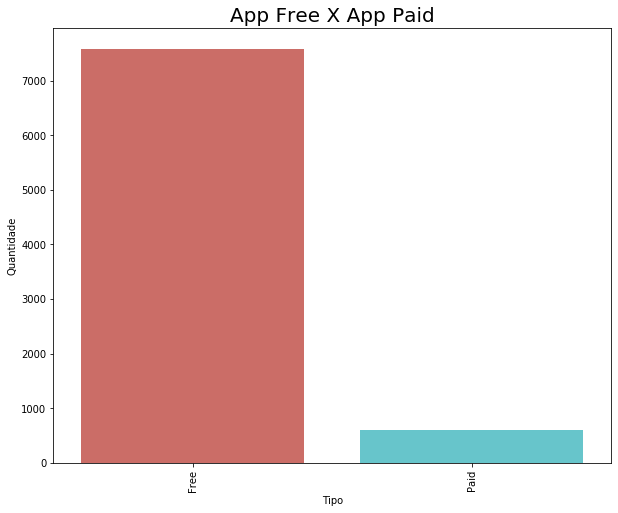

In [43]:
plt.figure(figsize=(10,8))
fig = sns.countplot(x=df_app.Type,  palette="hls")
plt.xlabel('Tipo')
plt.ylabel('Quantidade')
plt.title('App Free X App Paid', size=20)
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)

A maioria dos aplicativos da Play Store são gratuitos.

###**Entre os aplicativos pagos quais são os preços mais frequentes?**

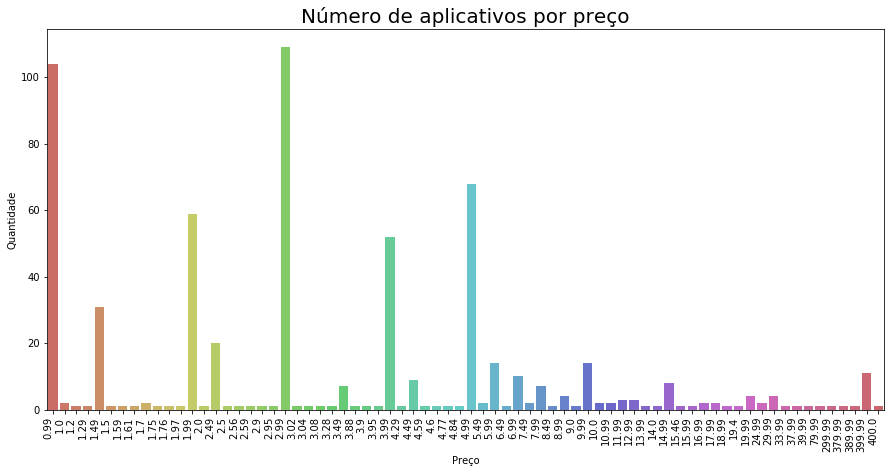

In [44]:
plt.figure(figsize=(15,7))
price_app = df_app[df_app.Price != 0.0]
price_plot = sns.countplot(price_app.Price, palette = "hls")
plt.xlabel('Preço')
plt.ylabel('Quantidade')
plt.title('Número de aplicativos por preço',size = 20)
price_plot.set_xticklabels(price_plot.get_xticklabels(), rotation=90, ha="right")
plt.show(fig)

Filtramos somente os aplicativos pagos para poder observar a sua distribuição. Há um número elevado de aplicativos que custam 0.99 e 3.02 dólares. 

###**Quais são as classificações mais frequentes?**

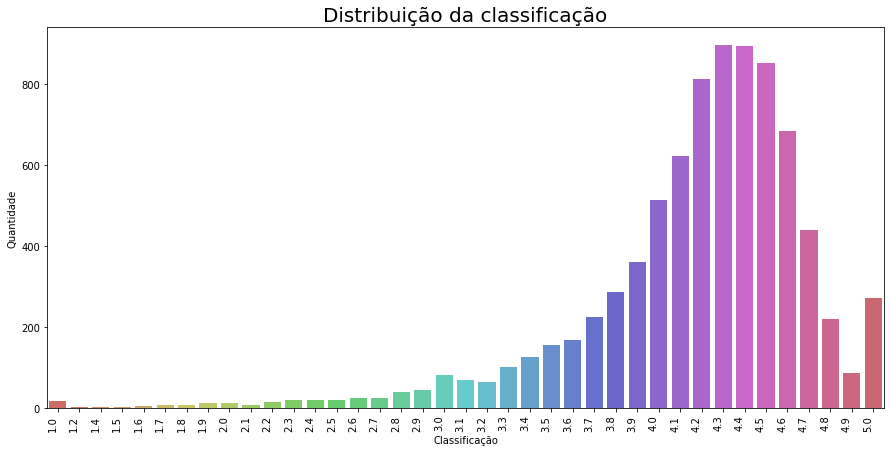

In [45]:
plt.figure(figsize=(15,7))
ratings = sns.countplot(x="Rating",data=df_app, palette = "hls")
ratings.set_xticklabels(ratings.get_xticklabels(), rotation=90, ha="right")
plt.xlabel('Classificação')
plt.ylabel('Quantidade')
plt.title('Distribuição da classificação',size = 20)
plt.show(fig)

A distribuição da classificação está entre 4.0 e 4.7.

##**Conclusão**

Depois de toda essa análise podemos concluir que os aplicativos voltados para rede social e games são os que mais atraem os usuários, então um desenvolvedor pode usar essa análise como base para criar seu próximo aplicativo.

